## Generate learning curves for each dataset

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from load_modules import *
%matplotlib inline
fpath = Path(os.getcwd())
print('Current path:', fpath)

Current path: /vol/ml/apartin/projects/dr-learning-curves/nbs


In [2]:
# Settings
drop_bad_r2fit = False
# drop_bad_r2fit = True
dpi = 200

## Path to data

In [3]:
fname = 'all_scores.csv'
# dpath = Path('../lc.out.summit.July2020/exp_1_and_2')
# dirs = glob(str(dpath/'*'))
# print(dirs)

In [4]:
# src = 'GDSC1'
# src = 'GDSC2'
# src = 'CTRP'
src = 'NCI60'

lgb_dft_label = 'dGBDT'
lgb_hpo_label = 'hGBDT'
nn0_label = 'sNN'
nn1_label = 'mNN'

if src == 'GDSC1':
    dpath = Path('../lc.out.new.r2fit_03/')
    nn0_path = Path(dpath, f'lc.gdsc1.nn_reg0.ls_hpo', fname)
    nn1_path = Path(dpath, f'lc.gdsc1.nn_reg1.ls_hpo', fname)
    lgb_path_hpo = Path(dpath, f'lc.gdsc1.lgb.ls_hpo', fname)
    lgb_path_dft = Path(dpath, f'lc.gdsc1.lgb.dflt', fname)

if src == 'GDSC2':
    dpath = Path('../lc.out.new.r2fit_03/')
    nn0_path = Path(dpath, f'lc.gdsc2.nn_reg0.ls_hpo', fname)
    nn1_path = Path(dpath, f'lc.gdsc2.nn_reg1.ls_hpo', fname)
    lgb_path_hpo = Path(dpath, f'lc.gdsc2.lgb.ls_hpo', fname)
    lgb_path_dft = Path(dpath, f'lc.gdsc2.lgb.dflt', fname)

if src == 'CTRP':
    """
    TODO!
    Consider experiment. Repeat the experiment with min_size=20000 as in GDSC.
    """
    dpath = Path('../lc.out.new.r2fit_03/')  # r2fit=0.3, min_size=50k
    # dpath = Path('../lc.out.summit.July2020/exp_1_and_2')  # r2fit=0.5, min_size=10k
    nn0_path = Path(dpath, f'lc.ctrp.nn_reg0.ls_hpo', fname)
    nn1_path = Path(dpath, f'lc.ctrp.nn_reg1.ls_hpo', fname)
    dpath = Path('../lc.out.new.r2fit_03/')
    lgb_path_hpo = Path(dpath, f'lc.ctrp.lgb.ls_hpo', fname)
    # lgb_path_hpo = Path(dpath, f'lc.ctrp.lgb.ls_hpo_20k', fname)
    lgb_path_dft = Path(dpath, f'lc.ctrp.lgb.dflt', fname)

if src == 'NCI60':
    dpath = Path('../lc.out.summit.July2020/exp_1_and_2')
    nn0_path = Path(dpath, f'lc.nci60.nn_reg0.random.ls_hpo', fname)
    nn1_path = Path(dpath, f'lc.nci60.nn_reg1.random.ls_hpo', fname)
    dpath = Path('../lc.out.nci60.lgb')
    lgb_path_hpo = Path(dpath, 'lc.nci60.lgb.ls_hpo', fname)
    lgb_path_dft = Path(dpath, 'lc.nci60.lgb.dflt', fname)

In [5]:
outpath = fpath/f'single_src_multi_model'
os.makedirs(outpath, exist_ok=True)

## Load data

In [6]:
lgb_dft = load_data(lgb_path_dft, tr_set='te');
lgb_hpo = load_data(lgb_path_hpo, tr_set='te');
nn0 = load_data(nn0_path, tr_set='te');
nn1 = load_data(nn1_path, tr_set='te');

In [7]:
print_count(aa=lgb_dft)
print_count(aa=lgb_hpo)
print_count(aa=nn0)
print_count(aa=nn1)

,tr_size,one
0,10,20
1,12,20
2,15,20
3,19,20
4,24,20
5,31,20
6,39,20
7,48,20
8,61,20
9,77,20


,tr_size,one
0,100000,20
1,123635,20
2,152858,20
3,188988,20
4,233657,20
5,288884,20
6,357164,20
7,441584,20
8,545956,20
9,674999,20


,tr_size,one
0,100000,20
1,118957,20
2,141508,20
3,168334,20
4,200246,19
5,238207,20
6,283365,20
7,337084,20
8,369806,2
9,400986,20


,tr_size,one
0,100000,20
1,118957,20
2,141508,20
3,168334,20
4,200246,20
5,238207,20
6,283365,20
7,337084,20
8,400986,20
9,477002,20


In [8]:
if drop_bad_r2fit:
    nn0 = drop_bad_r2(nn0)
    nn1 = drop_bad_r2(nn1)
    lgb_hpo = drop_bad_r2(lgb_hpo)
    lgb_dft = drop_bad_r2(lgb_dft)

In [9]:
# def calc_gof(y, yfit):
#     from sklearn import metrics
#     gof = {}
#     rmse = sqrt( metrics.mean_squared_error(y, yfit) )
#     mae = metrics.mean_absolute_error(y, yfit)
#     r2 = metrics.r2_score(y, yfit)
#     gof['rmse'] = rmse
#     gof['mae'] = mae
#     gof['r2'] = r2
#     return gof

In [10]:
# NCI60: remove bad samples
if src == 'NCI60':
    # np.unique(sorted(nn0.tr_size))
    nn0 = nn0[ ~nn0['tr_size'].isin([369806, 499618, 580947, 610743, 625000]) ].reset_index(drop=True)
    nn1 = nn1[ ~nn1['tr_size'].isin([369806, 499618, 580947, 610743, 625000]) ].reset_index(drop=True)

## Raw plots

In [11]:
# Global plotting params
# -------------------------------
met = 'mean_absolute_error';  # startParams = {'a': 1.2, 'b': -0.4, 'c': 0.04}
# met = 'mcc';  # startParams = {'a': 1.2, 'b': 0.4, 'c': 0.8}

t_set = 'te'
xtick_scale = 'log2'
ytick_scale = 'log2'
# xtick_scale = 'linear'
# ytick_scale = 'linear'

kwargs = {'metric_name': met,
          'tr_set': t_set,
          'xtick_scale': xtick_scale,
          'ytick_scale': ytick_scale,
          'plot_median': True}

legend_fontsize = 12

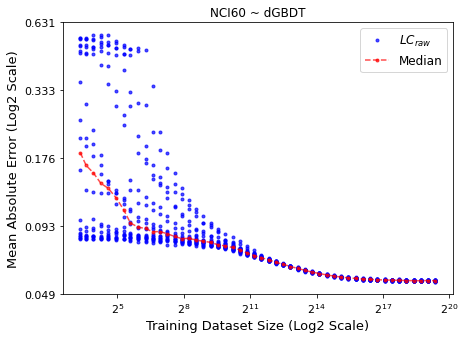

In [12]:
# Plot dGBDT (lgb_dft)
# -------------------------------
if lgb_dft is not None:
    kwargs.update({'title': f'{src} ~ {lgb_dft_label}'})
    ax = lc_plots.plot_lc_single_metric(lgb_dft, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    ax.grid(False)

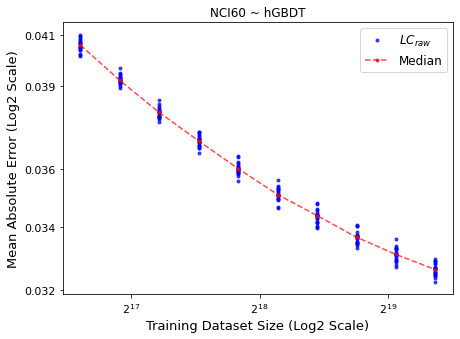

In [13]:
# Plot hGBDT (lgb_hpo)
# -------------------------------
if lgb_hpo is not None:
    kwargs.update({'title': f'{src} ~ {lgb_hpo_label}'})
    ax = lc_plots.plot_lc_single_metric(lgb_hpo, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    ax.grid(False)

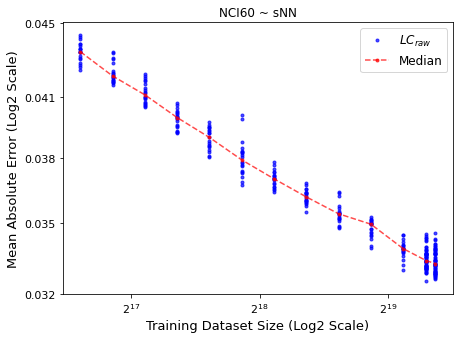

In [14]:
# Plot sNN (nn0)
# -------------------------------
if nn0 is not None:
    kwargs.update({'title': f'{src} ~ {nn0_label}'})
    ax = lc_plots.plot_lc_single_metric(nn0, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    ax.grid(False)

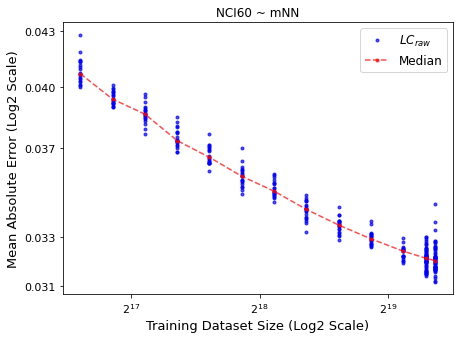

In [15]:
# Plot mNN (nn1)
# -------------------------------
if nn1 is not None:
    kwargs.update({'title': f'{src} ~ {nn1_label}'})
    ax = lc_plots.plot_lc_single_metric(nn1, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    ax.grid(False)

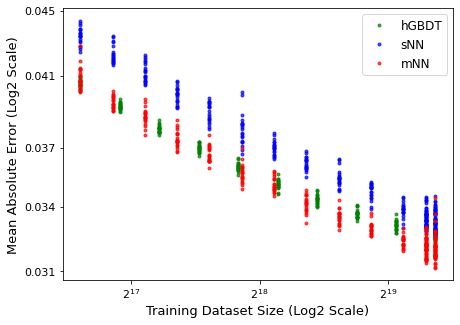

In [16]:
# Plot
# -------------------------------
ax = None
kwargs = {'metric_name': met,
          'xtick_scale': xtick_scale,
          'ytick_scale': ytick_scale}

# if lgb_dft is not None:
#     lgb = lgb_dft
#     lgb = lgb[ lgb.metric==met ].reset_index(drop=True)
#     ax = lc_plots.plot_lc(x=lgb['tr_size'].values, y=lgb['score'].values,
#                           color='m', label=f'{lgb_dft_label}', **kwargs, ax=ax);

if lgb_hpo is not None:
    lgb = lgb_hpo
    lgb = lgb[ lgb.metric==met ].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=lgb['tr_size'].values, y=lgb['score'].values,
                          color='g', label=f'{lgb_hpo_label}', **kwargs, ax=ax);

if nn0 is not None:
    nn0 = nn0[ nn0.metric==met ].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=nn0['tr_size'].values, y=nn0['score'].values,
                          color='b', label=f'{nn0_label}', **kwargs, ax=ax);

if nn1 is not None:
    nn1 = nn1[ nn1.metric==met ].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=nn1['tr_size'].values, y=nn1['score'].values,
                          color='r', label=f'{nn1_label}', **kwargs, ax=ax);

ax.legend(frameon=True, fontsize=legend_fontsize, loc='best');
ax.grid(False)

In [17]:
# nn0[nn0.tr_size == nn0.tr_size.max()].score.values
# nn1[nn1.tr_size == nn1.tr_size.max()].score.values

## Fitting

In [18]:
# Split dfit and dext
if src == 'GDSC1':
    x_fit_mn = 10000;
    x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}

elif src == 'GDSC2':
    x_fit_mn = 10000;
    x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}
    
elif src == 'CTRP':
    x_fit_mn = 10000;
    x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}    
    
elif src == 'NCI60':    
    x_fit_mn = 100000;
    x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}

# Dataframes to fit    
dfit_lgb_dft = fit_data(lgb_dft, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_lgb_hpo = fit_data(lgb_hpo, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_nn0     = fit_data(nn0, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_nn1     = fit_data(nn1, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)

In [19]:
# Percentage improvement as compared to dGBDT
# ------------------------------------------------------
v_dGBDT = dfit_lgb_dft.loc[:,'y'].values[-1]
v_hGBDT = dfit_lgb_hpo.loc[:,'y'].values[-1]
v_sNN = dfit_nn0.loc[:,'y'].values[-1]
v_mNN = dfit_nn1.loc[:,'y'].values[-1]

# dGBDT
df_lgb_dft = dfit_lgb_dft.iloc[-1:, :]
df_lgb_dft['model'] = 'dGBDT'
df_lgb_dft['Ds'] = np.nan

# hGBDT
df_lgb_hpo = dfit_lgb_hpo.iloc[-1:, :]
df_lgb_hpo['model'] = 'hGBDT'
df_lgb_hpo['Ds'] = np.around((v_dGBDT - v_hGBDT)/v_dGBDT * 100, 2)

# sNN
df_nn0 = dfit_nn0.iloc[-1:, :]
df_nn0['model'] = 'sNN'
df_nn0['Ds'] = np.around((v_dGBDT - v_sNN)/v_dGBDT * 100, 2)

# mNN
df_nn1 = dfit_nn1.iloc[-1:, :]
df_nn1['model'] = 'mNN'
df_nn1['Ds'] = np.around((v_dGBDT - v_mNN)/v_dGBDT * 100, 2)

# Concat
df = pd.concat([df_lgb_dft, df_lgb_hpo, df_nn0, df_nn1], axis=0).reset_index(drop=True)
df = df.drop(columns=['w'])
df.insert(loc=0, column='dataset', value=src, allow_duplicates=True)
df = df.rename(columns={'y': 'sK'})
df = df[['dataset', 'tr_size', 'model', 'sK', 'Ds']]

df_improve = df
del df
display(df_improve)
df_improve.to_csv(outpath/f'percent_imporve_{src}.csv', index=False)

,dataset,tr_size,model,sK,Ds
0,NCI60,674999,dGBDT,0.055406,NaN
1,NCI60,674999,hGBDT,0.032634,41.10
2,NCI60,674999,sNN,0.033246,40.00
3,NCI60,674999,mNN,0.032020,42.21


### Fit the data

In [20]:
pnts_args = {'metric_name': met,
             'xtick_scale': xtick_scale,
             'ytick_scale': ytick_scale,
             'alpha': 0.8,
             'ls': '',
             'marker': '.'}

fit_args = {'metric_name': met,
            'xtick_scale': xtick_scale,
            'ytick_scale': ytick_scale,
            'alpha': 0.8,
            'ls': '--',
            'marker': ''}

R[write to console]: Loading required package: broom

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




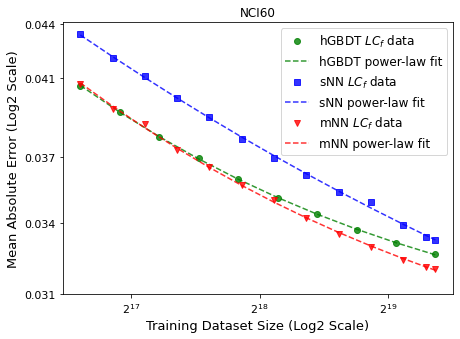

In [21]:
ax = None
fit_method = 'old'
# fit_method = 'new'

# -----------------------------
# dGBDT (LGB Default)
# -----------------------------
if lgb_dft is not None:
    aa = dfit_lgb_dft
    name = lgb_dft_label
    color = 'm'
    pnts_args.update({'marker': '>'})

    xf = aa['tr_size'].values
    yf = aa['y'].values
    
    cc_lgb_dft = None
    prms_lgb_dft = None
    
    if fit_method == 'new':
        cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        xf_plot, yf_plot = cc.calc_fit( x1=xf[0], x2=xf[-1] )
        cc_lgb_dft = cc
    else:
        # Old fit method (see single single_src.ipynb)  
        prms_lgb_dft = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_lgb_dft)
        xf_plot = xf
    
    gof_lgb_dft = calc_gof(yf, yf_plot)
    gof_lgb_dft['model'] = 'dGBDT'
    # Don't plot!
    # ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} data')
    # ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} fit')

# -----------------------------
# hGBDT (LGB HPO)
# -----------------------------
if lgb_hpo is not None:
    aa = dfit_lgb_hpo    
    name = lgb_hpo_label
    color = 'g'
    pnts_args.update({'marker': 'o'})

    xf = aa['tr_size'].values
    yf = aa['y'].values

    cc_lgb_hpo = None
    prms_lgb_hpo = None
    
    if fit_method == 'new':
        cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        # xf_plot, yf_plot = cc.calc_fit( x1=xf[0], x2=xf[-1] )
        xf_plot, yf_plot = cc.calc_fit( x=xf )
        cc_lgb_hpo = cc
    else:    
        # Old fit method (see single single_src.ipynb) 
        prms_lgb_hpo = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_lgb_hpo)
        xf_plot = xf
        
    gof_lgb_hpo = calc_gof(yf, yf_plot)
    gof_lgb_hpo['model'] = 'hGBDT'
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$ data')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} power-law fit') 

# -----------------------------    
# sNN (NN0)
# -----------------------------
if nn0 is not None:
    aa = dfit_nn0    
    name = nn0_label
    color = 'b'
    pnts_args.update({'marker': 's'})
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    
    cc_nn0 = None
    prms_nn0 = None
    
    if fit_method == 'new':
        cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        # xf_plot, yf_plot = cc_nn0.calc_fit( x1=xf[0], x2=xf[-1] )
        xf_plot, yf_plot = cc.calc_fit( x=xf )
        cc_nn0 = cc
    else:
        # Old fit method (see single single_src.ipynb)  
        prms_nn0 = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_nn0)
        xf_plot = xf
        
    gof_nn0 = calc_gof(yf, yf_plot)
    gof_nn0['model'] = 'sNN'
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$ data')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} power-law fit')

# -----------------------------    
# mNN (NN1)
# -----------------------------
if nn1 is not None:
    aa = dfit_nn1    
    name = nn1_label
    color = 'r'
    pnts_args.update({'marker': 'v'})
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    
    cc_nn1 = None
    prms_nn1 = None
    
    if fit_method == 'new':
        cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        # xf_plot, yf_plot = cc_nn1.calc_fit( x1=xf[0], x2=xf[-1] )
        xf_plot, yf_plot = cc.calc_fit( x=xf )
        cc_nn1 = cc        
    else:
        # Old fit method (see single single_src.ipynb) 
        prms_nn1 = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_nn1)
        xf_plot = xf
    
    gof_nn1 = calc_gof(yf, yf_plot)
    gof_nn1['model'] = 'mNN'
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$ data')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} power-law fit')


ax.set_title(f'{src}')
ax.legend(frameon=True, fontsize=12, loc='best')
ax.grid(False)
plt.savefig(outpath/f'{src}_fits.png', dpi=dpi)

In [22]:
# Dump the computed gof measures
# ------------------------------------------------------

gof_df = pd.DataFrame([gof_lgb_dft, gof_lgb_hpo, gof_nn0, gof_nn1])
gof_df = gof_df[['model', 'rmse', 'mae', 'r2']]
gof_df.insert(loc=0, column='dataset', value=src, allow_duplicates=True)
gof_df.to_csv(outpath/f'gof_{src}.csv', index=False)
display(gof_df)

,dataset,model,rmse,mae,r2
0,NCI60,dGBDT,0.000040,0.000032,0.948577
1,NCI60,hGBDT,0.000026,0.000023,0.999895
2,NCI60,sNN,0.000098,0.000070,0.999092
3,NCI60,mNN,0.000085,0.000065,0.999086


In [23]:
# Dump the estimated power-law parameters
# ------------------------------------------------------
df_list = []

if prms_lgb_dft is not None:
    # prms_lgb_dft['model'] = 'dGDBT'
    prms_lgb_dft_df = pd.DataFrame([prms_lgb_dft])
    prms_lgb_dft_df['model'] = 'dGDBT'
    df_list.append(prms_lgb_dft_df)

if prms_lgb_hpo is not None:
    # prms_lgb_hpo['model'] = 'hGDBT'
    prms_lgb_hpo_df = pd.DataFrame([prms_lgb_hpo])
    prms_lgb_hpo_df['model'] = 'hGDBT'
    df_list.append(prms_lgb_hpo_df)

if prms_nn0 is not None:
    # prms_nn0['model'] = 'sNN'
    prms_nn0_df = pd.DataFrame([prms_nn0])
    prms_nn0_df['model'] = 'sNN'
    df_list.append(prms_nn0_df)

if prms_nn1 is not None:
    # prms_nn1['model'] = 'mNN'
    prms_nn1_df = pd.DataFrame([prms_nn1])
    prms_nn1_df['model'] = 'mNN'
    df_list.append(prms_nn1_df)

df_prms = pd.concat(df_list, axis=0).reset_index(drop=True)
df_prms = df_prms[['model', 'alpha', 'beta', 'gamma']]
df_prms.insert(loc=0, column='dataset', value=src, allow_duplicates=True)
display(df_prms)
df_prms.to_csv(outpath/f'prms_{src}.csv', index=False)

,dataset,model,alpha,beta,gamma
0,NCI60,dGDBT,105656.814038,-1.639643,0.055390
1,NCI60,hGDBT,9.341873,-0.578478,0.028647
2,NCI60,sNN,0.914609,-0.324128,0.021452
3,NCI60,mNN,5.574027,-0.520406,0.026810


## Extrapolate

In [24]:
def inv_powerlaw(y, prms):
    vv = ((y - prms['gamma']) / prms['alpha'] ) ** (1/prms['beta'])
    if np.isnan(vv) == False:
        vv = int(vv)
    return vv

In [25]:
def get_score_at_2mK(dfit, prms):
    x_a = 2 * dfit['tr_size'].values[-1]
    return biased_powerlaw(x_a, **prms)

In [26]:
red_percent = 0.9

dGBDT = {}
dGBDT['model'] = 'dGBDT'
dGBDT['m_func_s'] = inv_powerlaw(red_percent * dfit_lgb_dft['y'].values[-1], prms_lgb_dft)
dGBDT['s2T'] = get_score_at_2mK(dfit_lgb_dft, prms_lgb_dft)

hGBDT = {}
hGBDT['model'] = 'hGBDT'
hGBDT['m_func_s'] = inv_powerlaw(red_percent * dfit_lgb_hpo['y'].values[-1], prms_lgb_hpo)
hGBDT['s2T'] = get_score_at_2mK(dfit_lgb_hpo, prms_lgb_hpo)

nn0 = {}
nn0['model'] = 'sNN'
nn0['m_func_s'] = inv_powerlaw(red_percent * dfit_nn0['y'].values[-1], prms_nn0)
nn0['s2T'] = get_score_at_2mK(dfit_nn0, prms_nn0)

nn1 = {}
nn1['model'] = 'mNN'
nn1['m_func_s'] = inv_powerlaw(red_percent * dfit_nn1['y'].values[-1], prms_nn1)
nn1['s2T'] = get_score_at_2mK(dfit_nn1, prms_nn1)

df_ext = pd.DataFrame([dGBDT, hGBDT, nn0, nn1])

In [27]:
display(df_ext)
display(df_improve)

,model,m_func_s,s2T
0,dGBDT,NaN,0.055400
1,hGBDT,12774917.0,0.031302
2,sNN,1876474.0,0.030876
3,mNN,4138578.0,0.030407


,dataset,tr_size,model,sK,Ds
0,NCI60,674999,dGBDT,0.055406,NaN
1,NCI60,674999,hGBDT,0.032634,41.10
2,NCI60,674999,sNN,0.033246,40.00
3,NCI60,674999,mNN,0.032020,42.21


In [28]:
dff = df_ext.merge(df_improve, on='model')
dff = dff[['dataset', 'model', 'tr_size', 'sK', 'Ds', 's2T', 'm_func_s']]
dff

,dataset,model,tr_size,sK,Ds,s2T,m_func_s
0,NCI60,dGBDT,674999,0.055406,NaN,0.055400,NaN
1,NCI60,hGBDT,674999,0.032634,41.10,0.031302,12774917.0
2,NCI60,sNN,674999,0.033246,40.00,0.030876,1876474.0
3,NCI60,mNN,674999,0.032020,42.21,0.030407,4138578.0


In [29]:
dff

,dataset,model,tr_size,sK,Ds,s2T,m_func_s
0,NCI60,dGBDT,674999,0.055406,NaN,0.055400,NaN
1,NCI60,hGBDT,674999,0.032634,41.10,0.031302,12774917.0
2,NCI60,sNN,674999,0.033246,40.00,0.030876,1876474.0
3,NCI60,mNN,674999,0.032020,42.21,0.030407,4138578.0


In [30]:
dff['s2T_impv'] = None
dff['m_factor'] = None

for m in dff['model'].values:
    # Percent improvement as compared to sK
    s_k = dff.loc[ dff['model']==m, 'sK' ]
    s_2k = dff.loc[ dff['model']==m, 's2T' ]
    vv = np.around((s_k - s_2k)/s_k * 100, 7)
    dff.loc[dff['model']==m, 's2T_impv'] = vv
    
    # The required data size as a factor of mK
    if np.isnan( dff.loc[ dff['model']==m, 'm_func_s' ] ).values[0] == False:
        dff.loc[dff['model']==m, 'm_factor'] = dff.loc[ dff['model']==m, 'm_func_s' ] / dff.loc[ dff['model']==m, 'tr_size' ]
        
dff = dff[['dataset', 'model', 'tr_size', 'sK', 'Ds', 's2T', 's2T_impv', 'm_func_s', 'm_factor']]
display(dff)

dff.to_csv(outpath/f'Table2_{src}.csv', index=False)

,dataset,model,tr_size,sK,Ds,s2T,s2T_impv,m_func_s,m_factor
0,NCI60,dGBDT,674999,0.055406,NaN,0.055400,0.0112733,NaN,None
1,NCI60,hGBDT,674999,0.032634,41.10,0.031302,4.07993,12774917.0,18.9258
2,NCI60,sNN,674999,0.033246,40.00,0.030876,7.13049,1876474.0,2.77997
3,NCI60,mNN,674999,0.032020,42.21,0.030407,5.0377,4138578.0,6.13124


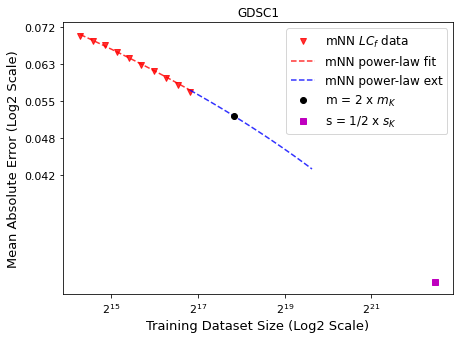

In [61]:
ax = None

aa = dfit_nn1
xf = aa['tr_size'].values
yf = aa['y'].values

# Plot data and fit
xf_plot = xf
yf_plot = biased_powerlaw(xf, **prms_nn1)
ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$ data')
ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} power-law fit')

# Add ext to the plot
factor = 7  # by how much to extrapolate
x_mn_ext = dfit_nn1['tr_size'].max()
x_mx_ext = dfit_nn1['tr_size'].max() * factor
xe = np.linspace(x_mn_ext, x_mx_ext, num=40)
ye = biased_powerlaw(xe, **prms_nn1)
ax = lc_plots.plot_lc(x=xe, y=ye, ax=ax, **fit_args, color='b', label=f'{name} power-law ext')

# ----------------------------------------------------------------------
# Compute score when m = 2 x m_K
# ------------------------------
x_a = 2*xf[-1]
y_a = biased_powerlaw(x_a, **prms_nn1)
ax.plot(x_a, y_a, 'ko', label='m = 2 x $m_{K}$')

# Score if T is doubled - horizontal
# xx_h = np.linspace(xf[0], x_a, 30)
# yy_h = np.ones((30, 1)) * y_a
# ax.plot(xx_h, yy_h, 'k--', label=None)
# ax = lc_plots.plot_lc(x=xx_h, y=ye, ax=ax, **fit_args, color='k')

# Score if T is doubled - vertical
# yy_v = np.linspace(ye.min(), y_a, 30)
# xx_v = np.ones((30, )) * x_a
# ax.plot(xx_v, yy_v, 'k--', label=None)
# ----------------------------------------------------------------------

# ----------------------------------------------------------------------
# Obtain m when s = 0.5 s_K
# ------------------------------
y_b = aa['y'].min() / 2
x_b = ((y_b - prms_nn1['gamma']) / prms_nn1['alpha'] ) ** (1/prms_nn1['beta'])

ax.plot(x_b, y_b, 'ms', label='s = 1/2 x $s_{K}$')

# # Score if T is doubled - horizontal
# xx_h = np.linspace(xf[0], 2*xf[-1], 30)
# yy_h = np.ones((30, 1)) * ye_
# ax.plot(xx_h, yy_h, 'k--', label=None)
# # ax = lc_plots.plot_lc(x=xx_h, y=ye, ax=ax, **fit_args, color='k')

# # Score if T is doubled - vertical
# yy_v = np.linspace(ye.min(), ye_, 30)
# xx_v = np.ones((30, )) * 2*xf[-1]
# ax.plot(xx_v, yy_v, 'k--', label=None)
# ----------------------------------------------------------------------

ax.set_title(f'{src}')
ax.legend(frameon=True, fontsize=12, loc='best')
ax.grid(False)

In [37]:
print('m_K = {} --> 2 x m_K = {}'.format( xf[-1], 2*xf[-1] ))
print('s_K = {} --> 0.5 x s_K = {}'.format( aa['y'].values[-1], 0.5 * aa['y'].values[-1] ))
print('m = 2 x m_K = {};  s = {}'.format(x_a, y_a) )
print(x_b, y_b)

m_K = 115863 --> 2 x m_K = 231726
s_K = 0.056903973109047365 --> 0.5 x s_K = 0.028451986554523682
m = 2 x m_K = 231726;  s = 0.05213849041698637
5831290.889117642 0.028451986554523682


In [50]:
# if cc_lgb_dft is not None:
#     print('lgb_dft')
#     display(cc_lgb_dft.coefs)

if cc_lgb_hpo is not None:
    print('lgb_hpo')
    display(cc_lgb_hpo.coefs)

if cc_nn0 is not None:
    print('nn0')
    display(cc_nn0.coefs)

if cc_nn1 is not None:
    print('nn1')
    display(cc_nn1.coefs)

In [51]:
ax = None
# fit_method = 'old'
fit_method = 'new'

src = 'GDSC1'
# src = 'GDSC2'
# src = 'CTRP'
# src = 'NCI60'

if src == 'GDSC1':
    data=gdsc1; name='GDSC1'; x_fit_mn=1000; x_fit_mx=None;
# data=gdsc2; name='GDSC2'; x_fit_mn=1000; x_fit_mx=None;
# data=ctrp; name='CTRP'; x_fit_mn=1000; x_fit_mx=None;
# data=nci; name='NCI-60'; x_fit_mn=10000; x_fit_mx=None; # startParams={'a': 2.5, 'b': -0.6, 'c': 0.05}

dfit_nn0 = fit_data(nn0, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)

# data = dfit_lgb_dft
# aa = fit_data(data, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
# dfit_all = fit_data(data, x_fit_mn=0, x_fit_mx=x_fit_mx)
aa = dfit_lgb_dft

# aa = dfit_lgb_dft
name = lgb_dft_label
color = 'm'

xf = aa['tr_size'].values
yf = aa['y'].values

if fit_method == 'new':
    cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
    xf_plot, yf_plot = cc.calc_fit( x1=xf[0], x2=xf[-1] )
    cc_lgb_dft = cc
else:
    # Old fit method (see single single_src.ipynb)  
    prms_lgb_dft = fit_params(x=xf, y=yf)
    yf_plot = biased_powerlaw(xf, **prms_lgb_dft)
    xf_plot = xf

# ----------
# Fit points
# ----------
ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label='$LC_{f}$ data')
ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'Power-law fit')

ax.set_title(f'{name}')
ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
ax.grid(False)

NameError: name 'gdsc1' is not defined

In [ ]:
# display(prms_nn0)
# display(prms_nn1)
# display(prms_lgb_hpo)
# display(prms_lgb_dft)

In [ ]:
# aa = nn0
# aa['std'] = aa['score']
# aa['min'] = aa['score']
# aa['max'] = aa['score']
# aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
# score_name = f'{met}_median'
# aa = aa.rename(columns={'score': score_name})
# aa['%'] = aa['std']/aa[score_name]
# aa

In [ ]:
# aa = nn1
# aa['std'] = aa['score']
# aa['min'] = aa['score']
# aa['max'] = aa['score']
# aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
# score_name = f'{met}_median'
# aa = aa.rename(columns={'score': score_name})
# aa['%'] = aa['std']/aa[score_name]
# aa

In [ ]:
# aa = lgb_hpo
# aa['std'] = aa['score']
# aa['min'] = aa['score']
# aa['max'] = aa['score']
# aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
# score_name = f'{met}_median'
# aa = aa.rename(columns={'score': score_name})
# aa['%'] = aa['std']/aa[score_name]
# aa

In [25]:
# aa = lgb_dft
# aa['std'] = aa['score']
# aa['min'] = aa['score']
# aa['max'] = aa['score']
# aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
# score_name = f'{met}_median'
# aa = aa.rename(columns={'score': score_name})
# aa['%'] = aa['std']/aa[score_name]
# aa